In [1370]:
import numpy as np 
import pandas as pd
import seaborn as sns

import re 
from datetime import datetime as dt
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

from sklearn import decomposition, preprocessing, metrics
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import ks_2samp
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

sns.set()

In [1371]:
import os
os.chdir('c:\\Users\\Matthieu\\Documents\\DAN-P9-data')  # détermination du répertoire courant

#### I/-ACP    

In [1372]:
df_final3 = pd.read_csv('df_final31.csv')

In [1373]:
df_final3 = df_final3.drop(columns=['Unnamed: 0'])
df_final3.isna().sum()

Pays                                     0
tx_variation_stabilite2000_20            3
Importation_2017                         0
Production_2017                          2
Dispo_prot_volaille (g/pers/an)_2017     0
habitants_2018                           0
tx_variation_population2017_18           0
exportValeur_2018                        0
exportValeur_2019                        5
exportValeur_2020                       10
exportValeur_2021                        9
exportValeur_tv1820                     10
exportTonnes_2021                        9
dtype: int64

In [1374]:
df_final3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Pays                                  94 non-null     object 
 1   tx_variation_stabilite2000_20         91 non-null     float64
 2   Importation_2017                      94 non-null     float64
 3   Production_2017                       92 non-null     float64
 4   Dispo_prot_volaille (g/pers/an)_2017  94 non-null     float64
 5   habitants_2018                        94 non-null     float64
 6   tx_variation_population2017_18        94 non-null     float64
 7   exportValeur_2018                     94 non-null     float64
 8   exportValeur_2019                     89 non-null     float64
 9   exportValeur_2020                     84 non-null     float64
 10  exportValeur_2021                     85 non-null     float64
 11  exportValeur_tv1820  

In [1375]:
# Remplacement des valeurs manquantes par 0 
df_final3.fillna(0, inplace=True)
df_final3.isna().mean()

Pays                                    0.0
tx_variation_stabilite2000_20           0.0
Importation_2017                        0.0
Production_2017                         0.0
Dispo_prot_volaille (g/pers/an)_2017    0.0
habitants_2018                          0.0
tx_variation_population2017_18          0.0
exportValeur_2018                       0.0
exportValeur_2019                       0.0
exportValeur_2020                       0.0
exportValeur_2021                       0.0
exportValeur_tv1820                     0.0
exportTonnes_2021                       0.0
dtype: float64

In [1376]:
# Avoir l'index sur la colonne 'Pays'
df_r = df_final3.reset_index(drop=True)
print(df_r)
df_final3 = df_r.set_index('Pays')

                     Pays  tx_variation_stabilite2000_20  Importation_2017  \
0          Afrique du Sud                           4.35             514.0   
1                 Albanie                        -114.81              38.0   
2               Allemagne                         -52.48             842.0   
3                  Angola                         -74.51             277.0   
4         Arabie saoudite                        -386.96             722.0   
..                    ...                            ...               ...   
89  États-Unis d'Amérique                        -101.85             123.0   
90               Éthiopie                          85.11               1.0   
91    Chine, continentale                           0.00             452.0   
92     Nouvelle-Calédonie                           0.00               9.0   
93    Polynésie française                           0.00              15.0   

    Production_2017  Dispo_prot_volaille (g/pers/an)_2017  habi

##### I/-A/- Data Split

In [1377]:
# Enregistrement de 'df_final3'dans X.
X = df_final3

In [1378]:
# Enregistrement des noms des pays dans une variable `names`.
names = df_final3.index
names

Index(['Afrique du Sud', 'Albanie', 'Allemagne', 'Angola', 'Arabie saoudite',
       'Arménie', 'Autriche', 'Bahamas', 'Belgique', 'Bosnie-Herzégovine',
       'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chypre', 'Congo', 'Croatie', 'Côte d'Ivoire',
       'Danemark', 'Djibouti', 'Espagne', 'Estonie', 'Finlande',
       'Fédération de Russie', 'Gabon', 'Ghana', 'Grèce', 'Guinée', 'Géorgie',
       'Haïti', 'Hongrie', 'Irlande', 'Italie', 'Japon', 'Kazakhstan',
       'Koweït', 'Lettonie', 'Liban', 'Libéria', 'Lituanie', 'Luxembourg',
       'Macédoine du Nord', 'Malaisie', 'Maldives', 'Mali', 'Malte', 'Maroc',
       'Maurice', 'Mozambique', 'Namibie', 'Niger', 'Nigéria', 'Norvège',
       'Oman', 'Pays-Bas', 'Philippines', 'Pologne', 'Portugal', 'Roumanie',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'République centrafricaine', 'République de

In [1379]:
# Enregistrement des colonnes dans une variable `features`.
features = df_final3.columns
features

Index(['tx_variation_stabilite2000_20', 'Importation_2017', 'Production_2017',
       'Dispo_prot_volaille (g/pers/an)_2017', 'habitants_2018',
       'tx_variation_population2017_18', 'exportValeur_2018',
       'exportValeur_2019', 'exportValeur_2020', 'exportValeur_2021',
       'exportValeur_tv1820', 'exportTonnes_2021'],
      dtype='object')

##### I/-B/ Scaling

In [1380]:
# On initialise un objet à partir de caractéristiques (instanciation).
scaler = StandardScaler()

In [1381]:
# Repérage des adaptions à faire.
scaler.fit(X)

StandardScaler()

In [1382]:
# Transformation 
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 0.24821133,  1.85003103,  0.29619723,  1.40205962,  0.1079354 ,
         0.20856437, -0.3109787 , -0.33998528, -0.32895505, -0.32323035,
        -0.12218051, -0.3107502 ],
       [-0.02227199, -0.40617079, -0.266457  , -0.19458806, -0.25541097,
        -0.95479425, -0.31623497, -0.3253413 , -0.30466062, -0.29021991,
         0.37172696, -0.25229284],
       [ 0.11921194,  3.40472472,  0.24415001,  0.15118278,  0.27556044,
        -0.4550416 ,  4.10434332,  4.30115037,  4.14711344,  4.86841733,
        -0.20158214,  3.93687579],
       [ 0.06920567,  0.72667004, -0.25659184, -0.73561771, -0.07061345,
         1.81432696, -0.2963718 , -0.33205872, -0.32895505, -0.29658261,
        -0.12218051, -0.2587638 ],
       [-0.64002994,  2.83593435, -0.06132973,  1.69901575, -0.05147023,
         0.57723435,  7.08769145,  6.24859887,  6.83840407,  6.09742626,
        -0.21364088,  6.63505839]])

In [1383]:
# On a une moyenne à 0 et un écart-type à 1.
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01


##### I/-C/ PCA

In [1384]:
# Travail sur les 8 premières composantes.
n_components = 8

In [1385]:
# Instanciation de l'ACP. 
pca = PCA(n_components=n_components)

In [1386]:
# Entraînement sur les données scalées (modifiées). 
pca.fit(X_scaled)

PCA(n_components=8)

##### I/-D/ Explained variance & scree plot

In [1387]:
# Enregistrement de l'analyse de cette variance dans la variable "scree". 
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([44.55, 16.11, 12.14,  8.58,  7.07,  4.99,  3.98,  1.43])

*Commentaire* : la 1ère composante capte environ 44% de la variance de nos données initiales, la 2ème 16%.

In [1388]:
scree_cum = scree.cumsum().round()
scree_cum

array([45., 61., 73., 81., 88., 93., 97., 99.])

*Commentaire* : les 2 premières composantes captent 61% de la variance, les 3 premières captent 73% de la variance.

In [1389]:
# Définition de la variable 'x_list' avec la liste de nos composantes.
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

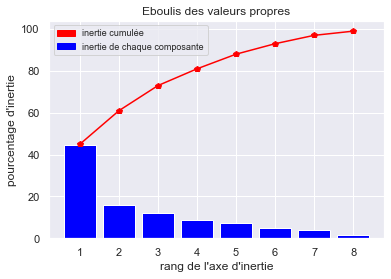

In [1390]:
# Affichage graphique.
plt.bar(x_list, scree, color='blue')
plt.plot(x_list, scree_cum,c="red", marker='p')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

red_patch = mpatches.Patch(color='red', label='inertie cumulée')
blue_patch = mpatches.Patch(color='blue', label='inertie de chaque composante')
plt.legend(loc='upper left', fontsize=9, handles=[red_patch, blue_patch])

plt.show()

*Commentaire* : Près de 81% de la variance est comprise dans les 4 premières composantes, et près de 88% dans les 5 premières. 

##### I/-E/ Components

Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes. 

La formule de ce calcul nous est donnée par l'attribut `components_`. Cette variable est généralement nommée `pcs` : 

In [1391]:
pcs = pca.components_
pcs

array([[ 0.00130146,  0.3003471 ,  0.02917739,  0.13163754,  0.02028698,
        -0.03818702,  0.42399675,  0.42627851,  0.42549985,  0.4238087 ,
        -0.03176396,  0.40814318],
       [ 0.13353378,  0.21891917,  0.63926829,  0.26494345,  0.59154012,
        -0.28242013, -0.07354592, -0.05274078, -0.05592039, -0.07638907,
         0.05379233, -0.0752112 ],
       [-0.46202484, -0.01687718,  0.23422951, -0.49933875,  0.37920357,
         0.57465812,  0.035381  ,  0.03223718,  0.04492439,  0.03575289,
        -0.03355627,  0.03612065],
       [ 0.2543417 , -0.08360483, -0.04490875, -0.27464763,  0.07301048,
        -0.02678088,  0.03141224,  0.03588779,  0.04853097,  0.04994624,
         0.91415555,  0.04494162],
       [-0.81677082,  0.08926541, -0.01539539,  0.35837968, -0.14360102,
        -0.21082326, -0.02860955, -0.02659274, -0.02707196, -0.04301872,
         0.35501287, -0.03214166],
       [ 0.18901271,  0.39174889, -0.00105926,  0.48833247, -0.12657405,
         0.70454099, -

In [1392]:
pcs = pd.DataFrame(pcs, columns = features)
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,tx_variation_stabilite2000_20,Importation_2017,Production_2017,Dispo_prot_volaille (g/pers/an)_2017,habitants_2018,tx_variation_population2017_18,exportValeur_2018,exportValeur_2019,exportValeur_2020,exportValeur_2021,exportValeur_tv1820,exportTonnes_2021
F1,0.00,0.30,0.03,0.13,0.02,-0.04,0.42,0.43,0.43,0.42,-0.03,0.41
F2,0.13,0.22,0.64,0.26,0.59,-0.28,-0.07,-0.05,-0.06,-0.08,0.05,-0.08
F3,-0.46,-0.02,0.23,-0.50,0.38,0.57,0.04,0.03,0.04,0.04,-0.03,0.04
F4,0.25,-0.08,-0.04,-0.27,0.07,-0.03,0.03,0.04,0.05,0.05,0.91,0.04
F5,-0.82,0.09,-0.02,0.36,-0.14,-0.21,-0.03,-0.03,-0.03,-0.04,0.36,-0.03
F6,0.19,0.39,-0.00,0.49,-0.13,0.70,-0.06,-0.03,-0.05,-0.11,0.18,-0.10
F7,-0.03,0.81,-0.33,-0.37,0.08,-0.21,-0.12,-0.05,-0.11,-0.09,-0.04,-0.09
F8,0.02,0.19,0.64,-0.27,-0.66,-0.03,-0.08,-0.07,-0.12,0.04,0.01,0.17


<AxesSubplot:>

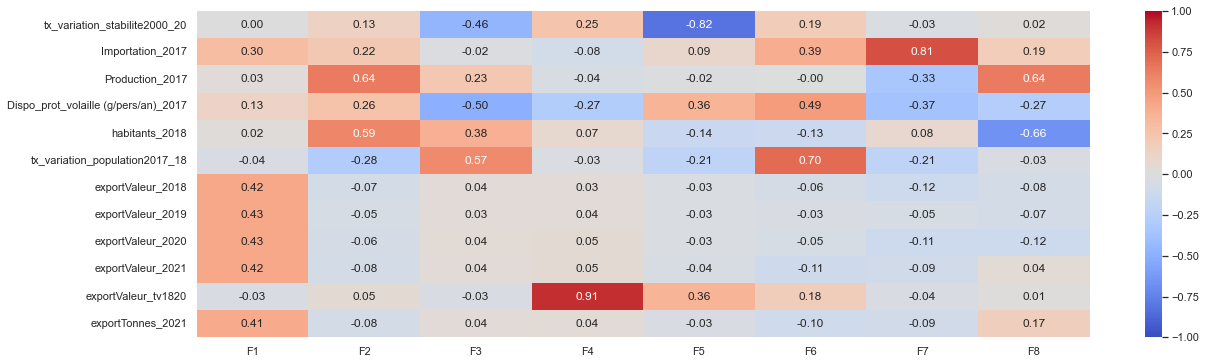

In [1393]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

##### I/-F/ Correlation graph

In [1394]:
# Définition des axes x et y.
x, y = 0,1

In [1395]:
# Fonction
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

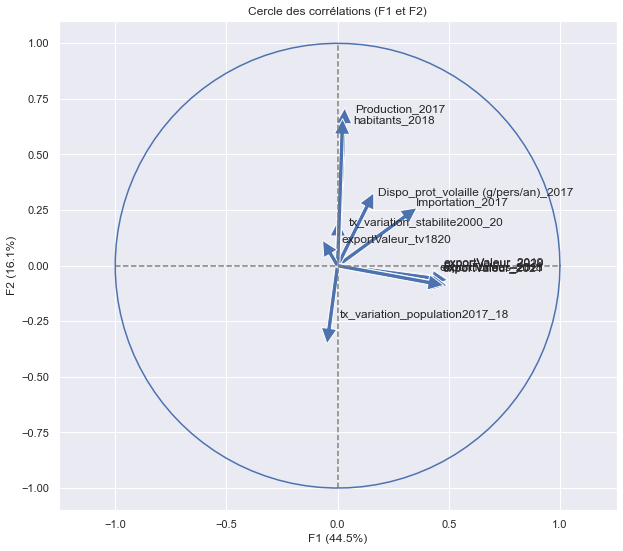

In [1396]:
# Pour F1 et F2  
x_y = (0,1)
x_y
correlation_graph(pca, x_y, features)

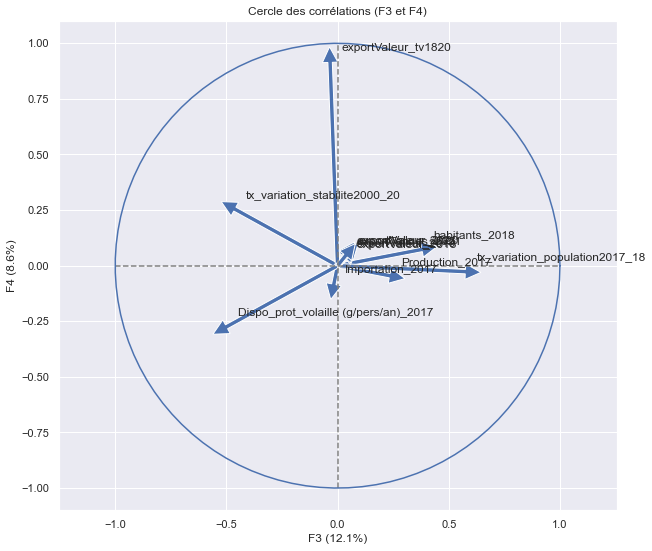

In [1397]:
# Pour F3 et F4
correlation_graph(pca, (2,3), features)

##### I/-G/ Projection

In [1398]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 0.06671548,  1.10460159, -0.67126699, -0.66735648,  0.40821266,
         1.67973745,  0.99129208,  0.10269628],
       [-0.76431008, -0.07662347, -0.66096097,  0.37821262,  0.3327787 ,
        -0.7311443 ,  0.1355867 ,  0.03897785],
       [10.08754833, -0.19051796,  0.50536093,  0.44584799, -0.43826842,
        -0.4718931 ,  0.76849464,  0.33623284],
       [-0.5913011 , -0.65152747,  1.22700388, -0.05866266, -0.619786  ,
         1.30729201,  0.70223322,  0.1875344 ],
       [14.92723314, -1.4566902 ,  0.92154236,  0.30321859,  0.16595966,
        -0.09550122, -1.49727225, -0.38629917]])

In [1399]:
x_y

(0, 1)

In [1400]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


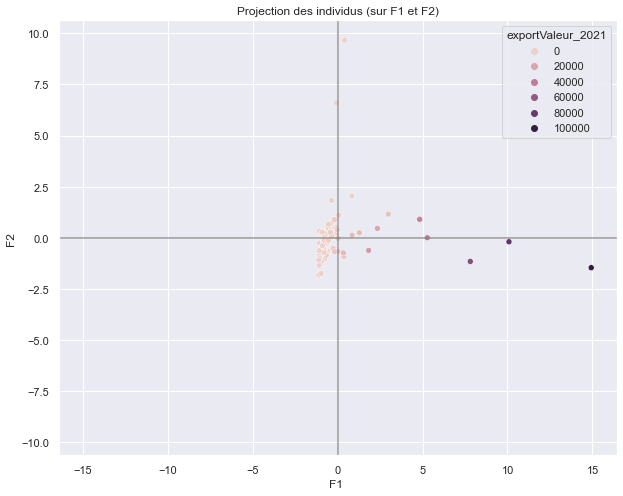

In [1401]:
# Pour 'exportValeur_2021' de F1 et F2 (sous forme de points)
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df_final3['exportValeur_2021'])

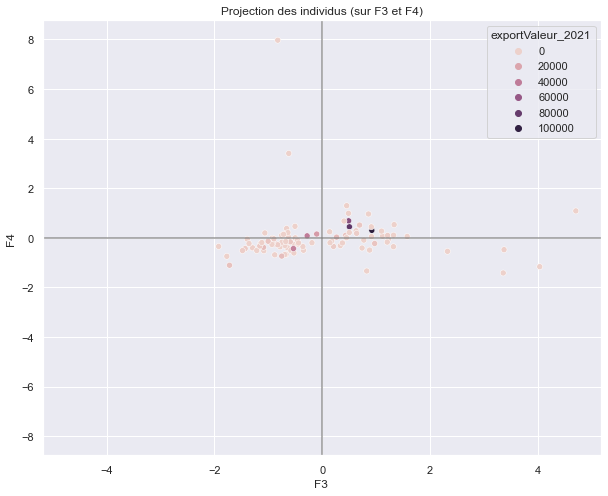

In [1402]:
# Pour 'exportValeur_2021' de F3 et F4 (sous forme de points)
x_y = [2,3]
display_factorial_planes(X_proj, x_y, clusters=df_final3['exportValeur_2021'])

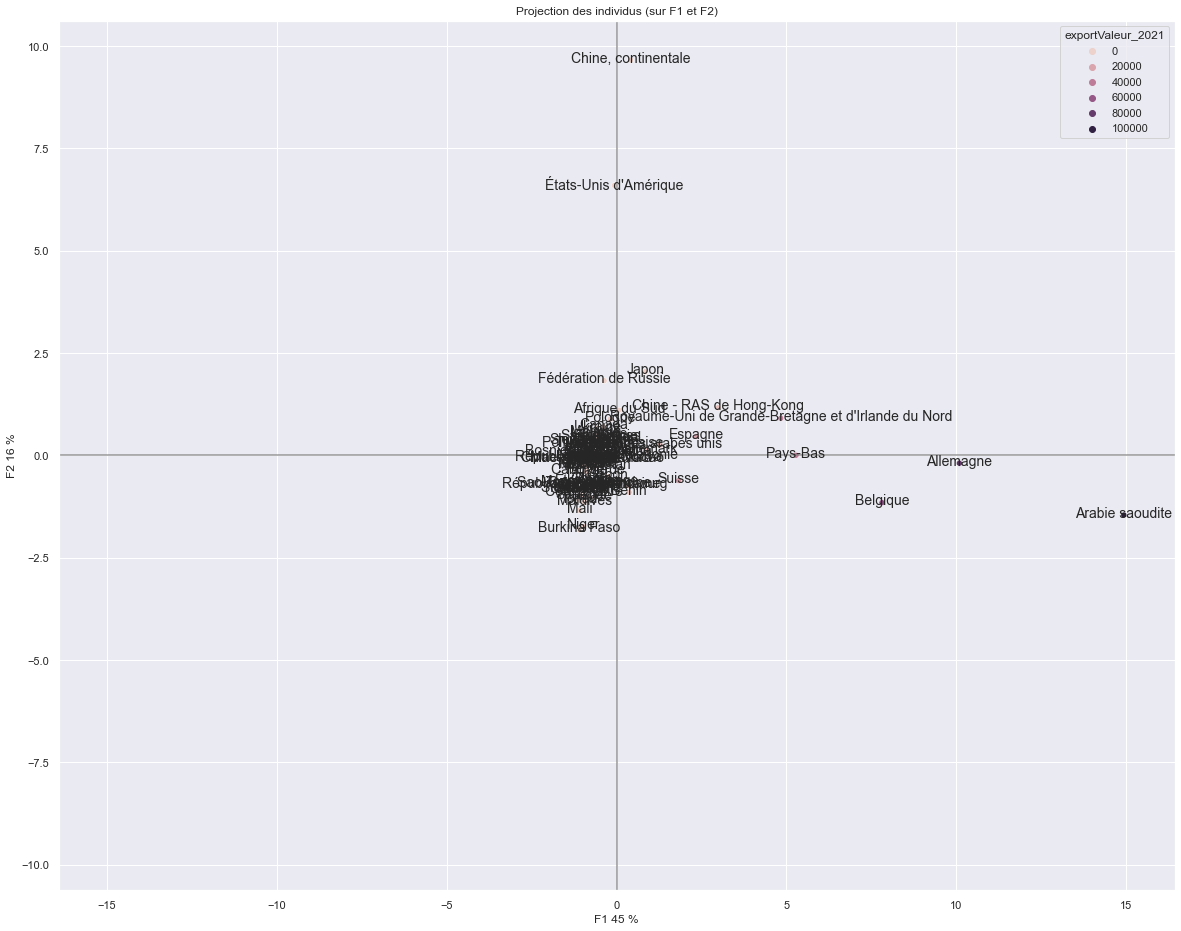

In [1403]:
# Pour 'exportValeur_2021' de F1 et F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df_final3['exportValeur_2021'], marker="o")

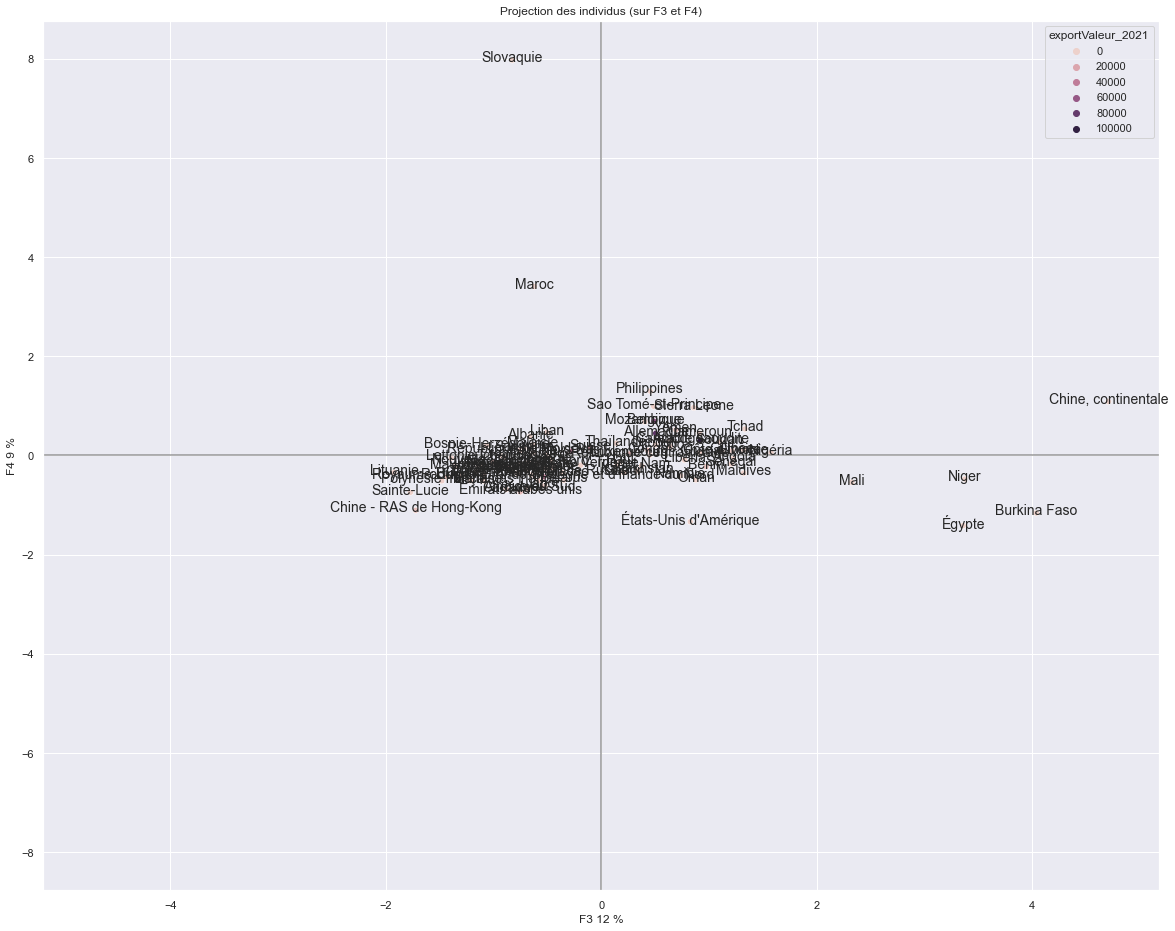

In [1404]:
# Pour 'exportValeur_2021' de F3 et F4 
x_y = 2,3
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df_final3['exportValeur_2021'],marker="o")

#### II/-Méthode des k-means   

In [1405]:
# Création du df_kmeans pour les opérations K-Means
df_kmeans = df_final3

c:\Users\Matthieu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


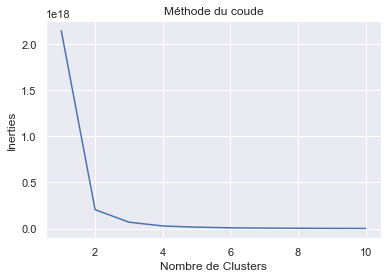

In [1406]:
# Méthode du coude pour trouver le nombre optimal de clusters
wcss = []
intertie = {}
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df_kmeans)
    wcss.append(km.inertia_)
    intertie[i] = km.inertia_
plt.plot(range(1,11),wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inerties')
plt.show()

In [1407]:
# Définition de 5 clusters pour les groupes
km = KMeans(n_clusters=5, random_state=0)
km.fit(df_kmeans)
clusters_km = km.labels_

In [1408]:
# Visualisation
clusters_km

array([0, 3, 4, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 0, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 4, 3, 3, 3, 4, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 4, 0, 4,
       3, 2, 4, 1, 3, 3])

In [1409]:
centroids = km.cluster_centers_
centroids

array([[ 4.30961111e+01,  1.82611111e+02,  9.24222222e+02,
         2.72715833e+03,  4.07135334e+07,  1.42444444e+00,
         1.15179444e+04,  9.70261111e+03,  8.62050000e+03,
         9.68327778e+03,  6.10822222e+01,  5.10263833e+03],
       [ 0.00000000e+00,  4.52000000e+02,  1.82360000e+04,
         1.44540000e+03,  1.42764779e+09,  4.70000000e-01,
         1.81600000e+03,  4.53700000e+03,  5.71100000e+03,
         1.84000000e+02,  2.14480000e+02,  9.32600000e+01],
       [-1.01850000e+02,  1.23000000e+02,  2.19140000e+04,
         7.27445000e+03,  3.27096265e+08,  6.20000000e-01,
         7.50000000e+01,  6.80000000e+01,  1.20000000e+01,
         0.00000000e+00, -8.40000000e+01,  0.00000000e+00],
       [-1.19125909e+02,  7.54090909e+01,  9.65000000e+01,
         2.65913561e+03,  6.81593006e+06,  1.02924242e+00,
         3.89818182e+03,  3.36953030e+03,  3.03727273e+03,
         3.38316667e+03,  2.87075758e+01,  1.73297591e+03],
       [-3.35175000e+02,  3.48500000e+02,  1.4620000

In [1410]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)

In [1411]:
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [1412]:
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3", "PC4"])
X_proj[:10]

,PC1,PC2,PC3,PC4
0,0.066715,1.104602,-0.671267,-0.667356
1,-0.764310,-0.076623,-0.660961,0.378213
2,10.087548,-0.190518,0.505361,0.445848
3,-0.591301,-0.651527,1.227004,-0.058663
4,14.927233,-1.456690,0.921542,0.303219
5,-0.790445,-0.202137,-0.518871,-0.264066
6,-0.498750,-0.100611,-0.452061,-0.249136
7,-0.635555,0.107493,-1.084633,-0.518042
8,7.810078,-1.152705,0.490319,0.687276
9,-0.829923,0.076042,-1.064782,0.198289


In [1413]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(centroids)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4"])

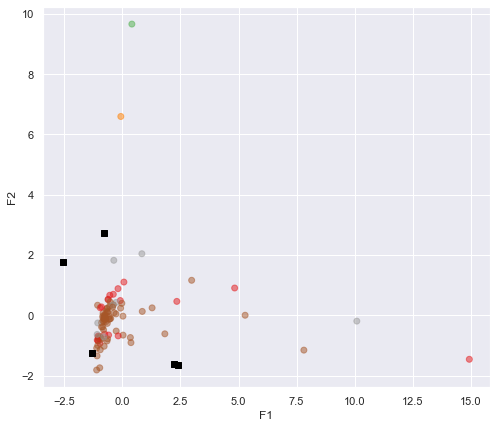

In [1414]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= clusters_km, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

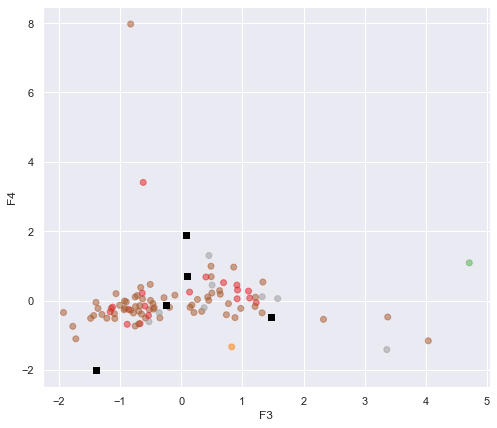

In [1415]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 2], X_proj.iloc[:, 3], c= clusters_km, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 2], centroids_proj.iloc[:, 3],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F3")
ax.set_ylabel("F4")
plt.show()

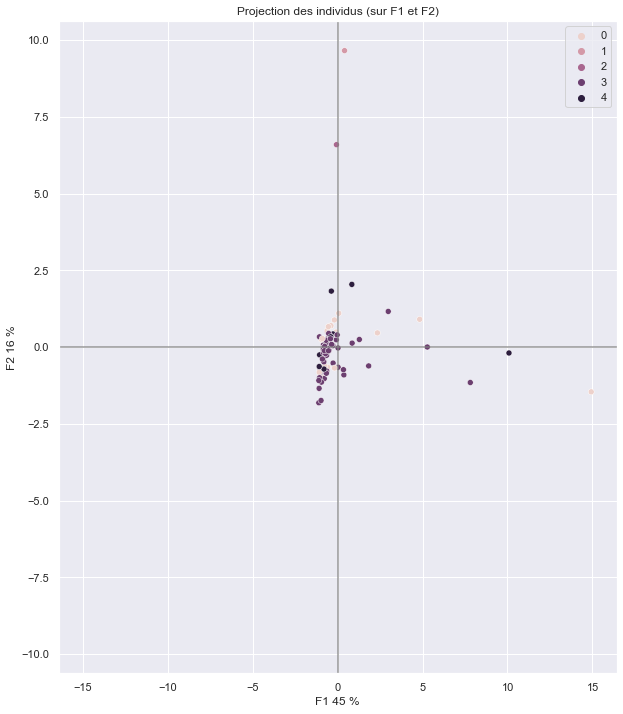

In [1416]:
display_factorial_planes(X_proj,  
                         x_y=(0,1), 
                         clusters=clusters_km, 
                         pca=pca, 
                         figsize=(10,12), 
                         alpha=1, 
                         marker ="s")                  

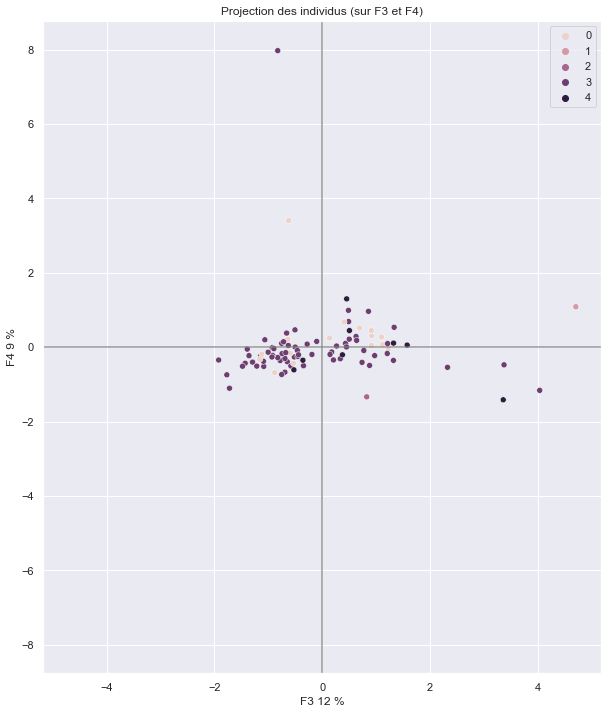

In [1417]:
display_factorial_planes(X_proj,  
                         x_y=(2,3), 
                         clusters=clusters_km, 
                         pca=pca, 
                         figsize=(10,12), 
                         alpha=1, 
                         marker ="s")   

In [1418]:
# Ajout de la colonne "ClusterKM"
df_kmeans['ClusterKM'] = clusters_km
df_kmeans

,tx_variation_stabilite2000_20,Importation_2017,Production_2017,Dispo_prot_volaille (g/pers/an)_2017,habitants_2018,tx_variation_population2017_18,exportValeur_2018,exportValeur_2019,exportValeur_2020,exportValeur_2021,exportValeur_tv1820,exportTonnes_2021,ClusterKM
Pays,,,,,,,,,,,,,
Afrique du Sud,4.35,514.0,1667.0,5150.15,5.779252e+07,1.37,237.0,0.0,0.0,0.0,0.00,0.00,0
Albanie,-114.81,38.0,13.0,2284.90,2.882740e+06,-0.05,142.0,218.0,338.0,524.0,138.03,486.38,3
Allemagne,-52.48,842.0,1514.0,2905.40,8.312442e+07,0.56,80038.0,69091.0,62274.0,82411.0,-22.19,35341.32,4
Angola,-74.51,277.0,42.0,1314.00,3.080979e+07,3.33,501.0,118.0,0.0,423.0,0.00,432.54,0
Arabie saoudite,-386.96,722.0,616.0,5683.05,3.370276e+07,1.82,133958.0,98082.0,99717.0,101920.0,-25.56,57790.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
États-Unis d'Amérique,-101.85,123.0,21914.0,7274.45,3.270963e+08,0.62,75.0,68.0,12.0,0.0,-84.00,0.00,2
Éthiopie,85.11,1.0,14.0,14.60,1.092244e+08,2.65,58.0,39.0,8.0,18.0,-86.21,9.13,4
"Chine, continentale",0.00,452.0,18236.0,1445.40,1.427648e+09,0.47,1816.0,4537.0,5711.0,184.0,214.48,93.26,1


In [1419]:
# Affichage du détail des clusters
for i in range(0,5):
    print(f"Cluster {i}:")
    print(", ".join(df_kmeans.index[clusters_km == i].sort_values())) 
    print(" ")

Cluster 0:
Afrique du Sud, Angola, Arabie saoudite, Cameroun, Canada, Côte d'Ivoire, Espagne, Ghana, Italie, Malaisie, Maroc, Mozambique, Pologne, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, Soudan, Thaïlande, Ukraine, Yémen
 
Cluster 1:
Chine, continentale
 
Cluster 2:
États-Unis d'Amérique
 
Cluster 3:
Albanie, Arménie, Autriche, Bahamas, Belgique, Bosnie-Herzégovine, Bulgarie, Burkina Faso, Bélarus, Bénin, Cabo Verde, Cambodge, Chine - RAS de Hong-Kong, Chine - RAS de Macao, Chypre, Congo, Croatie, Danemark, Djibouti, Estonie, Finlande, Gabon, Grèce, Guinée, Géorgie, Haïti, Hongrie, Irlande, Kazakhstan, Koweït, Lettonie, Liban, Libéria, Lituanie, Luxembourg, Macédoine du Nord, Maldives, Mali, Malte, Maurice, Namibie, Niger, Norvège, Nouvelle-Calédonie, Oman, Pays-Bas, Polynésie française, Portugal, Roumanie, République centrafricaine, République de Moldova, Sainte-Lucie, Sao Tomé-et-Principe, Serbie, Sierra Leone, Slovaquie, Slovénie, Suisse, Suriname, Suède, Sénégal, Tchad

In [1420]:
# Moyennes des variables par cluster
groupes_centroides = df_kmeans.groupby(['ClusterKM']).mean().reset_index()
groupes_centroides

,ClusterKM,tx_variation_stabilite2000_20,Importation_2017,Production_2017,Dispo_prot_volaille (g/pers/an)_2017,habitants_2018,tx_variation_population2017_18,exportValeur_2018,exportValeur_2019,exportValeur_2020,exportValeur_2021,exportValeur_tv1820,exportTonnes_2021
0,0,43.096111,182.611111,924.222222,2727.158333,4.071353e+07,1.424444,11517.944444,9702.611111,8620.500000,9683.277778,61.082222,5102.638333
1,1,0.000000,452.000000,18236.000000,1445.400000,1.427648e+09,0.470000,1816.000000,4537.000000,5711.000000,184.000000,214.480000,93.260000
2,2,-101.850000,123.000000,21914.000000,7274.450000,3.270963e+08,0.620000,75.000000,68.000000,12.000000,0.000000,-84.000000,0.000000
3,3,-119.125909,75.409091,96.500000,2659.135606,6.815930e+06,1.029242,3898.181818,3369.530303,3037.272727,3383.166667,28.707576,1732.975909
4,4,-335.175000,348.500000,1462.000000,1786.675000,1.202226e+08,1.273750,10514.125000,9264.500000,8606.500000,10566.375000,10.623750,4590.216250


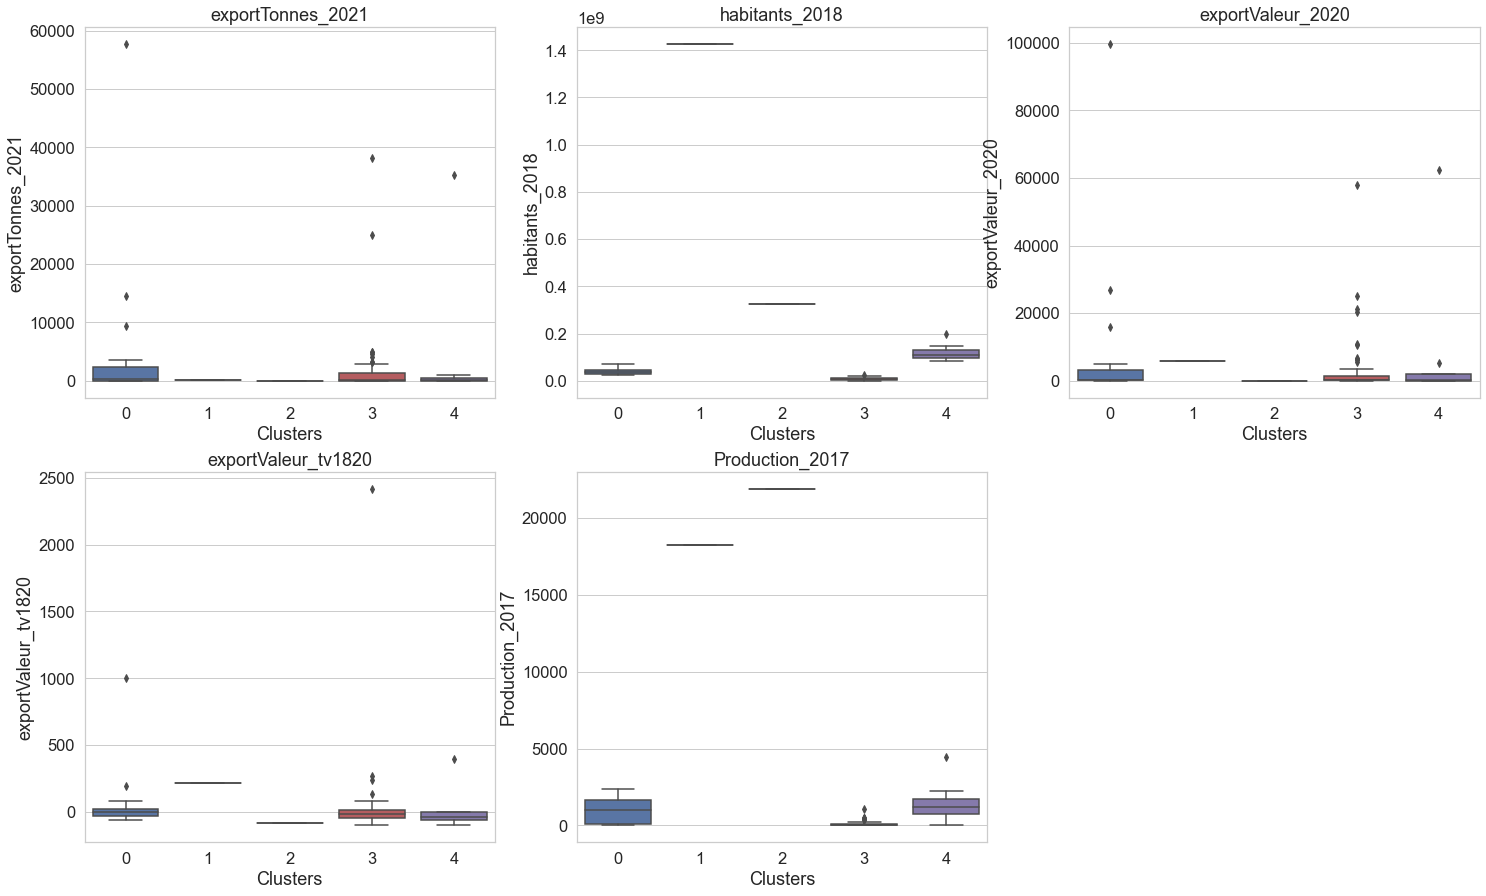

In [1421]:
plt.figure(figsize=(25,15))
sns.set(style="whitegrid", font_scale=1.5)


plt.subplot(231)
sns.boxplot(x="ClusterKM", y="exportTonnes_2021", data=df_kmeans)
plt.title('exportTonnes_2021')
plt.xlabel('Clusters')

plt.subplot(232)
sns.boxplot(x="ClusterKM", y="habitants_2018", data=df_kmeans)
plt.title('habitants_2018')
plt.xlabel('Clusters')

plt.subplot(233)
sns.boxplot(x="ClusterKM", y="exportValeur_2020", data=df_kmeans)
plt.title('exportValeur_2020')
plt.xlabel('Clusters')

plt.subplot(234)
sns.boxplot(x="ClusterKM", y="exportValeur_tv1820", data=df_kmeans)
plt.title('exportValeur_tv1820')
plt.xlabel('Clusters')

plt.subplot(235)
sns.boxplot(x="ClusterKM", y="Production_2017", data=df_kmeans)
plt.title('Production_2017')
plt.xlabel('Clusters')

plt.show(block=False)

In [1422]:
groupes_centroides_kmeans = groupes_centroides.set_index('ClusterKM')
groupes_centroides_kmeans

,tx_variation_stabilite2000_20,Importation_2017,Production_2017,Dispo_prot_volaille (g/pers/an)_2017,habitants_2018,tx_variation_population2017_18,exportValeur_2018,exportValeur_2019,exportValeur_2020,exportValeur_2021,exportValeur_tv1820,exportTonnes_2021
ClusterKM,,,,,,,,,,,,
0,43.096111,182.611111,924.222222,2727.158333,4.071353e+07,1.424444,11517.944444,9702.611111,8620.500000,9683.277778,61.082222,5102.638333
1,0.000000,452.000000,18236.000000,1445.400000,1.427648e+09,0.470000,1816.000000,4537.000000,5711.000000,184.000000,214.480000,93.260000
2,-101.850000,123.000000,21914.000000,7274.450000,3.270963e+08,0.620000,75.000000,68.000000,12.000000,0.000000,-84.000000,0.000000
3,-119.125909,75.409091,96.500000,2659.135606,6.815930e+06,1.029242,3898.181818,3369.530303,3037.272727,3383.166667,28.707576,1732.975909
4,-335.175000,348.500000,1462.000000,1786.675000,1.202226e+08,1.273750,10514.125000,9264.500000,8606.500000,10566.375000,10.623750,4590.216250


In [1423]:
groupes_centroides_kmeans = groupes_centroides.set_index('ClusterKM')

X = groupes_centroides_kmeans.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Position des centroïdes
coor_centroides_kmeans = pd.DataFrame(X_scaled, columns=groupes_centroides_kmeans.columns, index=groupes_centroides_kmeans.index)
coor_centroides_kmeans

,tx_variation_stabilite2000_20,Importation_2017,Production_2017,Dispo_prot_volaille (g/pers/an)_2017,habitants_2018,tx_variation_population2017_18,exportValeur_2018,exportValeur_2019,exportValeur_2020,exportValeur_2021,exportValeur_tv1820,exportTonnes_2021
ClusterKM,,,,,,,,,,,,
0,1.110239,-0.378306,-0.799345,-0.214271,-0.644619,1.254955,1.287576,1.180831,1.030609,1.081649,0.153615,1.288780
1,0.781861,1.519735,1.020899,-0.822689,1.955967,-1.343519,-0.810616,-0.233011,0.154618,-1.006779,1.734727,-1.017901
2,0.005798,-0.798309,1.407622,1.944213,-0.107634,-0.935144,-1.187133,-1.456188,-1.561234,-1.047231,-1.341787,-1.060845
3,-0.125838,-1.133622,-0.886376,-0.246559,-0.708179,0.179018,-0.360312,-0.552550,-0.650386,-0.303438,-0.180080,-0.262857
4,-1.772059,0.790502,-0.742800,-0.660694,-0.495535,0.844690,1.070485,1.060919,1.026394,1.275799,-0.366475,1.052824


<AxesSubplot:ylabel='ClusterKM'>

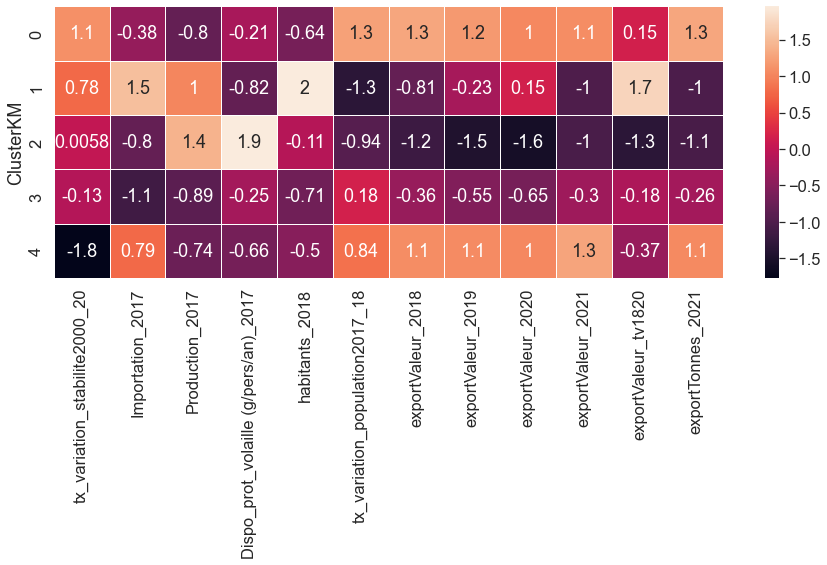

In [1424]:
# Affichage de la carte de chaleur
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(coor_centroides_kmeans, annot = True, linewidths = .5, ax = ax)

#### III/-Classification ascendante hiérarchique     

In [1425]:
df_final3 = df_final3.drop('ClusterKM', axis=1)

In [1426]:
# préparation des données pour le clustering
X = df_final3.values
names = df_final3.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique avec la méthode de Ward
Z = linkage(X_scaled, 'ward')

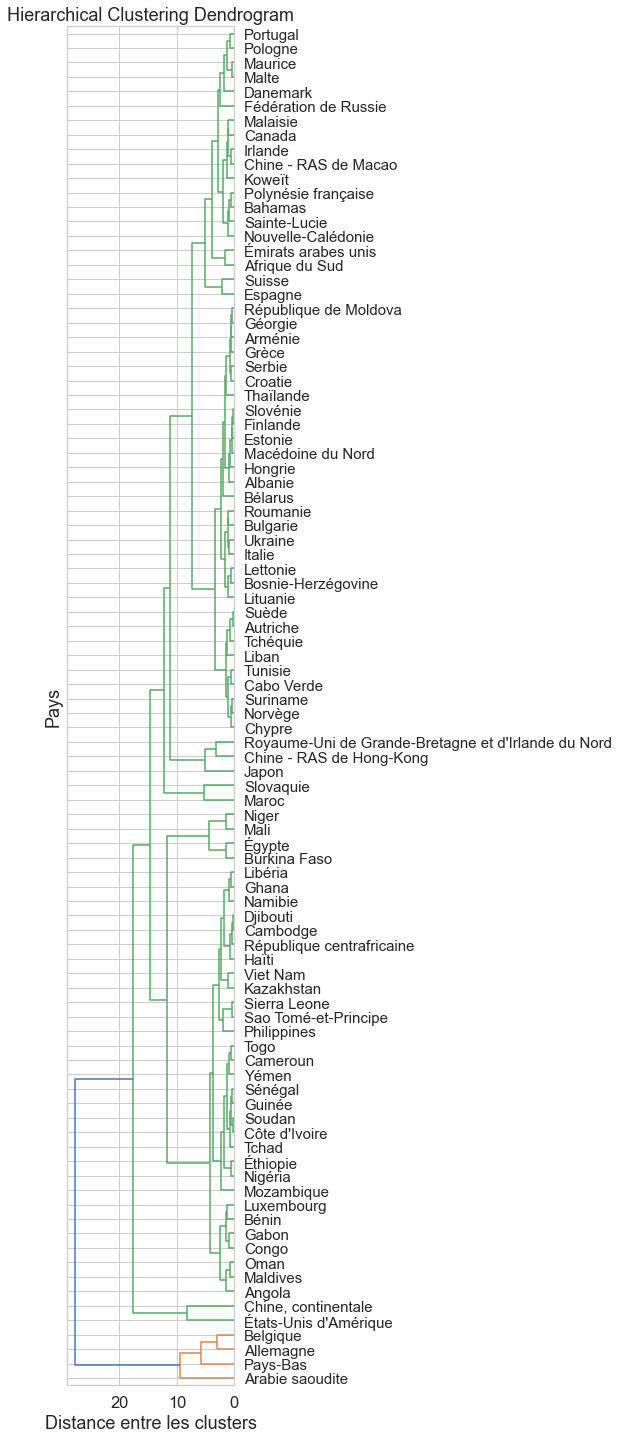

In [1427]:
# Affichage du dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(3,25))

_ = dendrogram(Z, ax=ax, labels=names, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance entre les clusters")
ax.set_ylabel("Pays")
ax.tick_params(axis='y', which='major', labelsize=15)
plt.show()

In [1428]:
# Découpe du dendrogramme en 6 clusters
cah = fcluster(Z, 6, criterion='maxclust')

# Création d'un data frame 'groupes' avec une colonne cluster et une colonne 'Pays'
groupes = pd.DataFrame({"cluster": cah, "Pays": names})
print(groupes)

    cluster                   Pays
0         6         Afrique du Sud
1         6                Albanie
2         1              Allemagne
3         3                 Angola
4         1        Arabie saoudite
..      ...                    ...
89        2  États-Unis d'Amérique
90        3               Éthiopie
91        2    Chine, continentale
92        6     Nouvelle-Calédonie
93        6    Polynésie française

[94 rows x 2 columns]


In [1429]:
# Liste des différents cluters
for i in range(1,7):
    print(f"Groupe {i}:")
    print(", ".join(df_final3.index[cah == i].sort_values())) 
    print(" ")

Groupe 1:
Allemagne, Arabie saoudite, Belgique, Pays-Bas
 
Groupe 2:
Chine, continentale, États-Unis d'Amérique
 
Groupe 3:
Angola, Bénin, Cambodge, Cameroun, Congo, Côte d'Ivoire, Djibouti, Gabon, Ghana, Guinée, Haïti, Kazakhstan, Libéria, Luxembourg, Maldives, Mozambique, Namibie, Nigéria, Oman, Philippines, République centrafricaine, Sao Tomé-et-Principe, Sierra Leone, Soudan, Sénégal, Tchad, Togo, Viet Nam, Yémen, Éthiopie
 
Groupe 4:
Burkina Faso, Mali, Niger, Égypte
 
Groupe 5:
Maroc, Slovaquie
 
Groupe 6:
Afrique du Sud, Albanie, Arménie, Autriche, Bahamas, Bosnie-Herzégovine, Bulgarie, Bélarus, Cabo Verde, Canada, Chine - RAS de Hong-Kong, Chine - RAS de Macao, Chypre, Croatie, Danemark, Espagne, Estonie, Finlande, Fédération de Russie, Grèce, Géorgie, Hongrie, Irlande, Italie, Japon, Koweït, Lettonie, Liban, Lituanie, Macédoine du Nord, Malaisie, Malte, Maurice, Norvège, Nouvelle-Calédonie, Pologne, Polynésie française, Portugal, Roumanie, Royaume-Uni de Grande-Bretagne et d'I

In [1430]:
# Ajout de "cluster" déjà mis en place à df_final3 
df_final3['cluster'] = cah

In [1431]:
# Moyennes par cluster
groupes_centroides = df_final3.groupby(['cluster']).mean().reset_index()
groupes_centroides

,cluster,tx_variation_stabilite2000_20,Importation_2017,Production_2017,Dispo_prot_volaille (g/pers/an)_2017,habitants_2018,tx_variation_population2017_18,exportValeur_2018,exportValeur_2019,exportValeur_2020,exportValeur_2021,exportValeur_tv1820,exportTonnes_2021
0,1,-134.732500,627.500000,923.250000,3337.925000,3.634223e+07,0.787500,78151.250000,65059.250000,61207.500000,72762.000000,-19.785000,39063.680000
1,2,-50.925000,287.500000,20075.000000,4359.925000,8.773720e+08,0.545000,945.500000,2302.500000,2861.500000,92.000000,65.240000,46.630000
2,3,-13.778667,65.300000,113.466667,1134.541667,2.869450e+07,2.354667,1803.233333,1465.600000,1438.566667,1355.433333,4.269333,818.443000
3,4,-1937.290000,28.500000,307.750000,598.600000,3.992391e+07,2.975000,240.500000,270.000000,324.750000,330.750000,5.865000,270.610000
4,5,184.200000,33.000000,416.500000,2195.475000,2.074105e+07,0.675000,13.500000,187.000000,262.000000,145.000000,1709.375000,38.995000
5,6,-27.594808,123.134615,491.153846,3552.151923,1.802104e+07,0.321538,3481.250000,3182.557692,2589.826923,2861.442308,-7.922692,1172.638269


In [1432]:
# sns.pairplot(df_final3, hue="cluster")

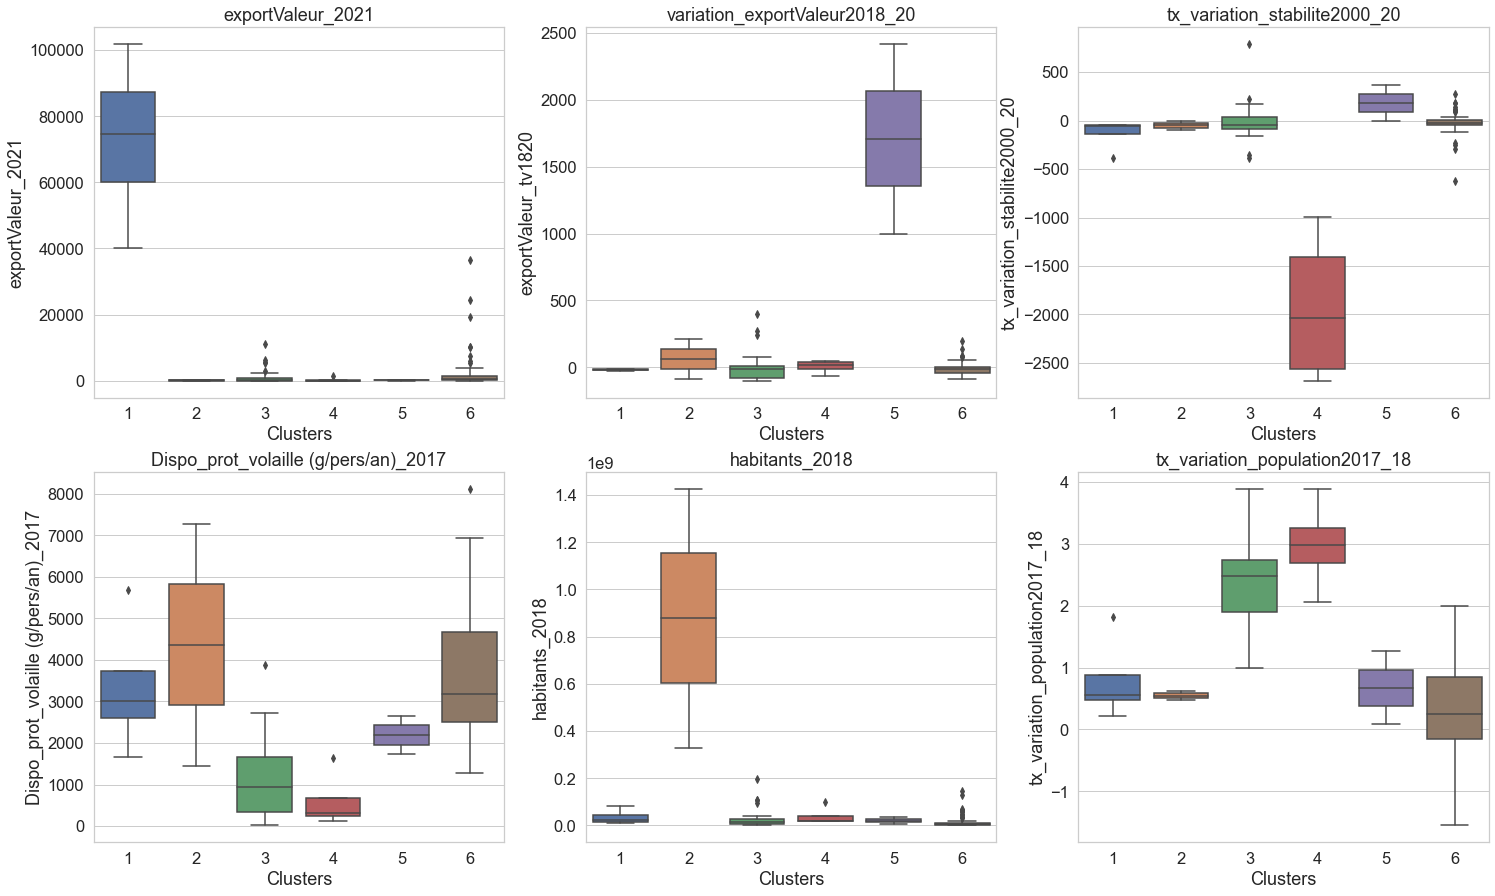

In [1433]:
plt.figure(figsize=(25,15))
sns.set(style="whitegrid", font_scale=1.5)

plt.subplot(231)
sns.boxplot(x="cluster", y="exportValeur_2021", data=df_final3)
plt.title('exportValeur_2021')
plt.xlabel('Clusters')

plt.subplot(232)
sns.boxplot(x="cluster", y="exportValeur_tv1820", data=df_final3)
plt.title('variation_exportValeur2018_20')
plt.xlabel('Clusters')

plt.subplot(233)
sns.boxplot(x="cluster", y="tx_variation_stabilite2000_20", data=df_final3)
plt.title('tx_variation_stabilite2000_20')
plt.xlabel('Clusters')

plt.subplot(234)
sns.boxplot(x="cluster", y="Dispo_prot_volaille (g/pers/an)_2017", data=df_final3)
plt.title('Dispo_prot_volaille (g/pers/an)_2017')
plt.xlabel('Clusters')


plt.subplot(235)
sns.boxplot(x="cluster", y="habitants_2018", data=df_final3)
plt.title('habitants_2018')
plt.xlabel('Clusters')

plt.subplot(236)
sns.boxplot(x="cluster", y="tx_variation_population2017_18", data=df_final3)
plt.title('tx_variation_population2017_18')
plt.xlabel('Clusters')

plt.show(block=False)

In [1434]:
groupes_centroides_CAH = groupes_centroides.set_index('cluster')

Xi = groupes_centroides_CAH.values
std_scale = preprocessing.StandardScaler().fit(Xi)
X_scaled = std_scale.transform(Xi)

# Position des centroïdes
coor_centroides_CAH = pd.DataFrame(X_scaled, columns=groupes_centroides_CAH.columns, index=groupes_centroides_CAH.index)
coor_centroides_CAH

,tx_variation_stabilite2000_20,Importation_2017,Production_2017,Dispo_prot_volaille (g/pers/an)_2017,habitants_2018,tx_variation_population2017_18,exportValeur_2018,exportValeur_2019,exportValeur_2020,exportValeur_2021,exportValeur_tv1820,exportTonnes_2021
cluster,,,,,,,,,,,,
1,0.269299,2.036924,-0.382349,0.601371,-0.423063,-0.485113,2.234272,2.233844,2.233829,2.234616,-0.493053,2.235150
2,0.384868,0.438762,2.234814,1.361869,2.235394,-0.725709,-0.459110,-0.412154,-0.385436,-0.479224,-0.358957,-0.476416
3,0.436092,-0.605683,-0.493009,-1.038228,-0.447237,1.069753,-0.429187,-0.447440,-0.449314,-0.432041,-0.455116,-0.422777
4,-2.216400,-0.778661,-0.466460,-1.437037,-0.411741,1.685217,-0.483704,-0.497850,-0.499315,-0.470308,-0.452599,-0.460850
5,0.709102,-0.757509,-0.451599,-0.248758,-0.472378,-0.596730,-0.491623,-0.501350,-0.502132,-0.477244,2.234070,-0.476946
6,0.417040,-0.333833,-0.441397,0.760783,-0.480975,-0.947417,-0.370648,-0.375049,-0.397632,-0.375800,-0.474345,-0.398161


<AxesSubplot:ylabel='cluster'>

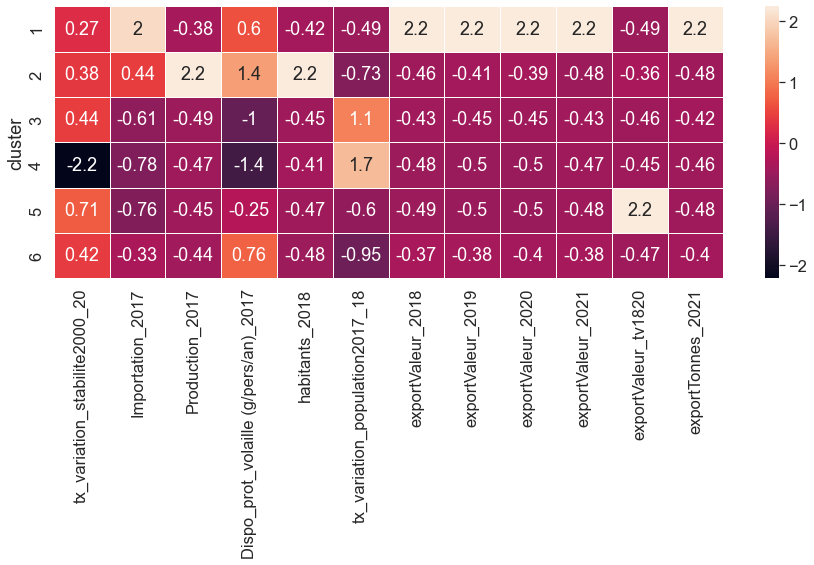

In [1435]:
# Heatmap
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(coor_centroides_CAH, annot = True, linewidths = .5, ax = ax)

In [1436]:
# extraction de la colonne "cluster" de df_final3
clusters_groupes_centroides = df_final3["cluster"]
clusters_groupes_centroides.to_numpy()
clusters_groupes_centroides

Pays
Afrique du Sud           6
Albanie                  6
Allemagne                1
Angola                   3
Arabie saoudite          1
                        ..
États-Unis d'Amérique    2
Éthiopie                 3
Chine, continentale      2
Nouvelle-Calédonie       6
Polynésie française      6
Name: cluster, Length: 94, dtype: int32

In [1437]:
# transformations en array
groupes_centroides = groupes_centroides.to_numpy()
groupes_centroides

array([[ 1.00000000e+00, -1.34732500e+02,  6.27500000e+02,
         9.23250000e+02,  3.33792500e+03,  3.63422280e+07,
         7.87500000e-01,  7.81512500e+04,  6.50592500e+04,
         6.12075000e+04,  7.27620000e+04, -1.97850000e+01,
         3.90636800e+04],
       [ 2.00000000e+00, -5.09250000e+01,  2.87500000e+02,
         2.00750000e+04,  4.35992500e+03,  8.77372026e+08,
         5.45000000e-01,  9.45500000e+02,  2.30250000e+03,
         2.86150000e+03,  9.20000000e+01,  6.52400000e+01,
         4.66300000e+01],
       [ 3.00000000e+00, -1.37786667e+01,  6.53000000e+01,
         1.13466667e+02,  1.13454167e+03,  2.86944973e+07,
         2.35466667e+00,  1.80323333e+03,  1.46560000e+03,
         1.43856667e+03,  1.35543333e+03,  4.26933333e+00,
         8.18443000e+02],
       [ 4.00000000e+00, -1.93729000e+03,  2.85000000e+01,
         3.07750000e+02,  5.98600000e+02,  3.99239088e+07,
         2.97500000e+00,  2.40500000e+02,  2.70000000e+02,
         3.24750000e+02,  3.30750000e

In [1438]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final3)

In [1439]:
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [1440]:
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3", "PC4"])
X_proj[:10]

,PC1,PC2,PC3,PC4
0,-0.119924,-1.464890,0.542949,-0.605771
1,-0.928685,-0.823494,-0.468572,0.356332
2,10.343997,0.424048,0.046368,0.418765
3,-0.342162,1.868962,0.152564,-0.084870
4,15.122223,0.581686,-1.183402,0.006183
5,-0.945559,-0.640995,-0.516387,-0.195927
6,-0.655825,-0.664892,-0.408715,-0.199791
7,-0.820554,-1.247302,-0.483144,-0.393222
8,8.112038,1.146150,-0.709900,0.710307
9,-1.009175,-1.163210,-0.479533,0.300814


In [1441]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(groupes_centroides)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4"], 
                              index=["cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5", "cluster_6"])

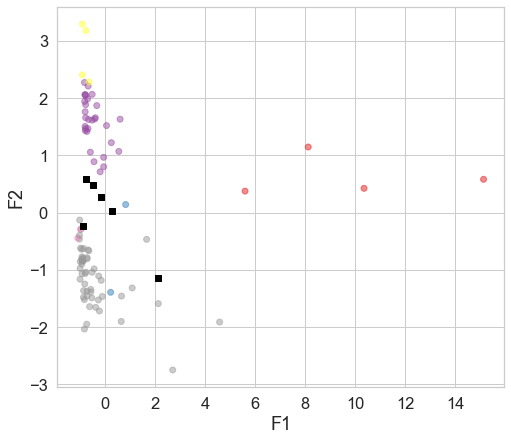

In [1442]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= clusters_groupes_centroides, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

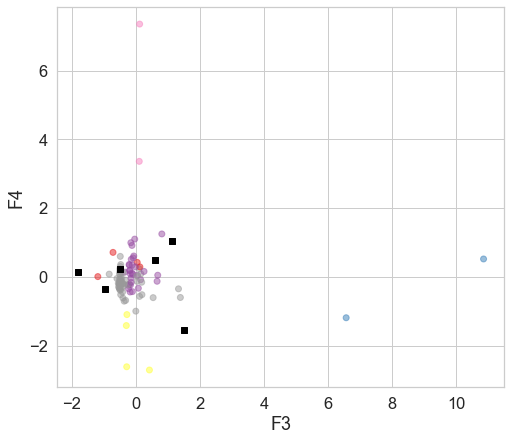

In [1443]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 2], X_proj.iloc[:, 3], c= clusters_groupes_centroides, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 2], centroids_proj.iloc[:, 3],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F3")
ax.set_ylabel("F4")
plt.show()

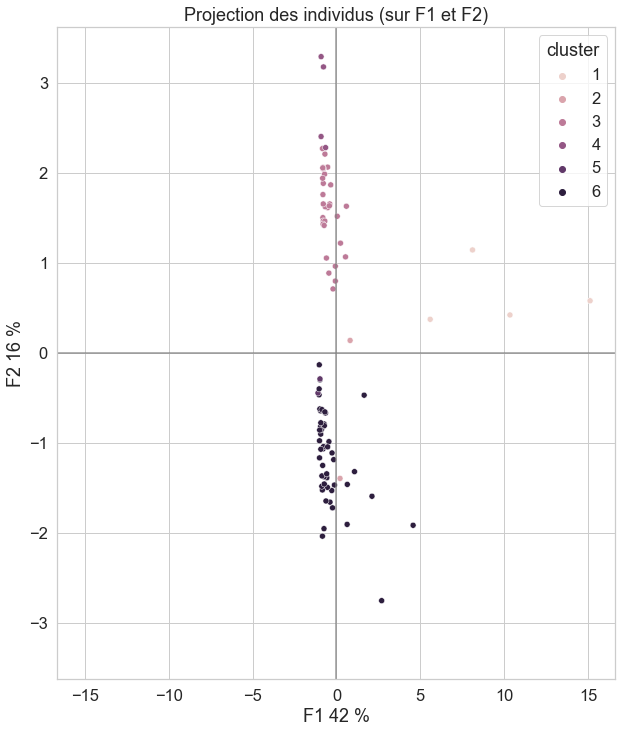

In [1444]:
display_factorial_planes(X_proj,  
                         x_y=(0,1), 
                         clusters=clusters_groupes_centroides, 
                         pca=pca, 
                         figsize=(10,12), 
                         alpha=1, 
                         marker ="s")  

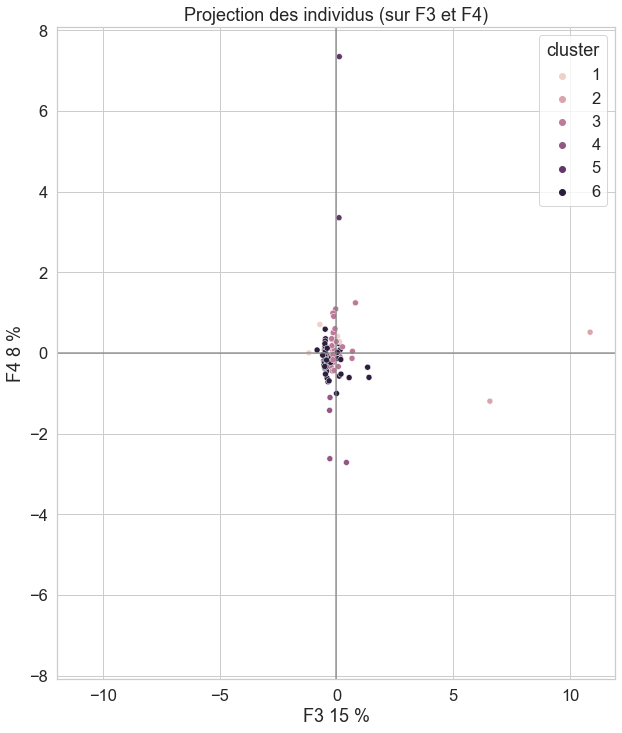

In [1445]:
display_factorial_planes(X_proj,  
                         x_y=(2,3), 
                         clusters=clusters_groupes_centroides, 
                         pca=pca, 
                         figsize=(10,12), 
                         alpha=1, 
                         marker ="s")  